In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import r2_score
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Обращение к данным
ds=pd.read_csv('/content/drive/MyDrive/Dataset_wine/winequality-red.csv')

In [3]:
# Чтение данных из dataset
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Вывод количества строк и столбцов Dataset
print(f'Количество строк {ds.shape[0]}') # Записи
print(f'Количество столбцов {ds.shape[1]}') # Признаки

Количество строк 1599
Количество столбцов 12


In [5]:
# Вывод информации по признакам и DataFrame
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
# Проверка на наличие пропусков в признаках
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Количество дублирующихся записей
print('Количество дублирующихся записей:', ds.duplicated().sum())

Количество дублирующихся записей: 240


In [8]:
# Перезапись Dataset без дублирующихся записей
ds_new=ds.drop_duplicates(keep='first')

In [9]:
# Вывод количества строк и столбцов Dataset без дублирующихся записей
print(f'Количество строк: {ds_new.shape[0]}') # Записи
print(f'Количество столбцов: {ds_new.shape[1]}') # Признаки

Количество строк: 1359
Количество столбцов: 12


In [10]:
# Вывод названий столбцов (признаков)
ds_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# Вывод количества записей с соответствующим значением "quality"
print('quality ', 'quantity')
print(ds_new['quality'].value_counts())
print(' ')
print('Вино хорошего качества - вино с качеством свыше 6,5') # Комментарий

quality  quantity
5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64
 
Вино хорошего качества - вино с качеством свыше 6,5


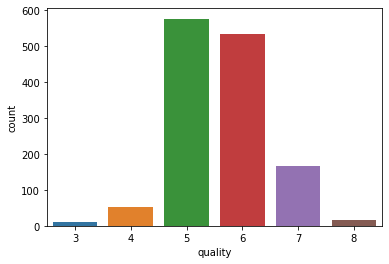

In [12]:
# Построение гистограммы по "quality"
sns.countplot(x=ds_new['quality'])

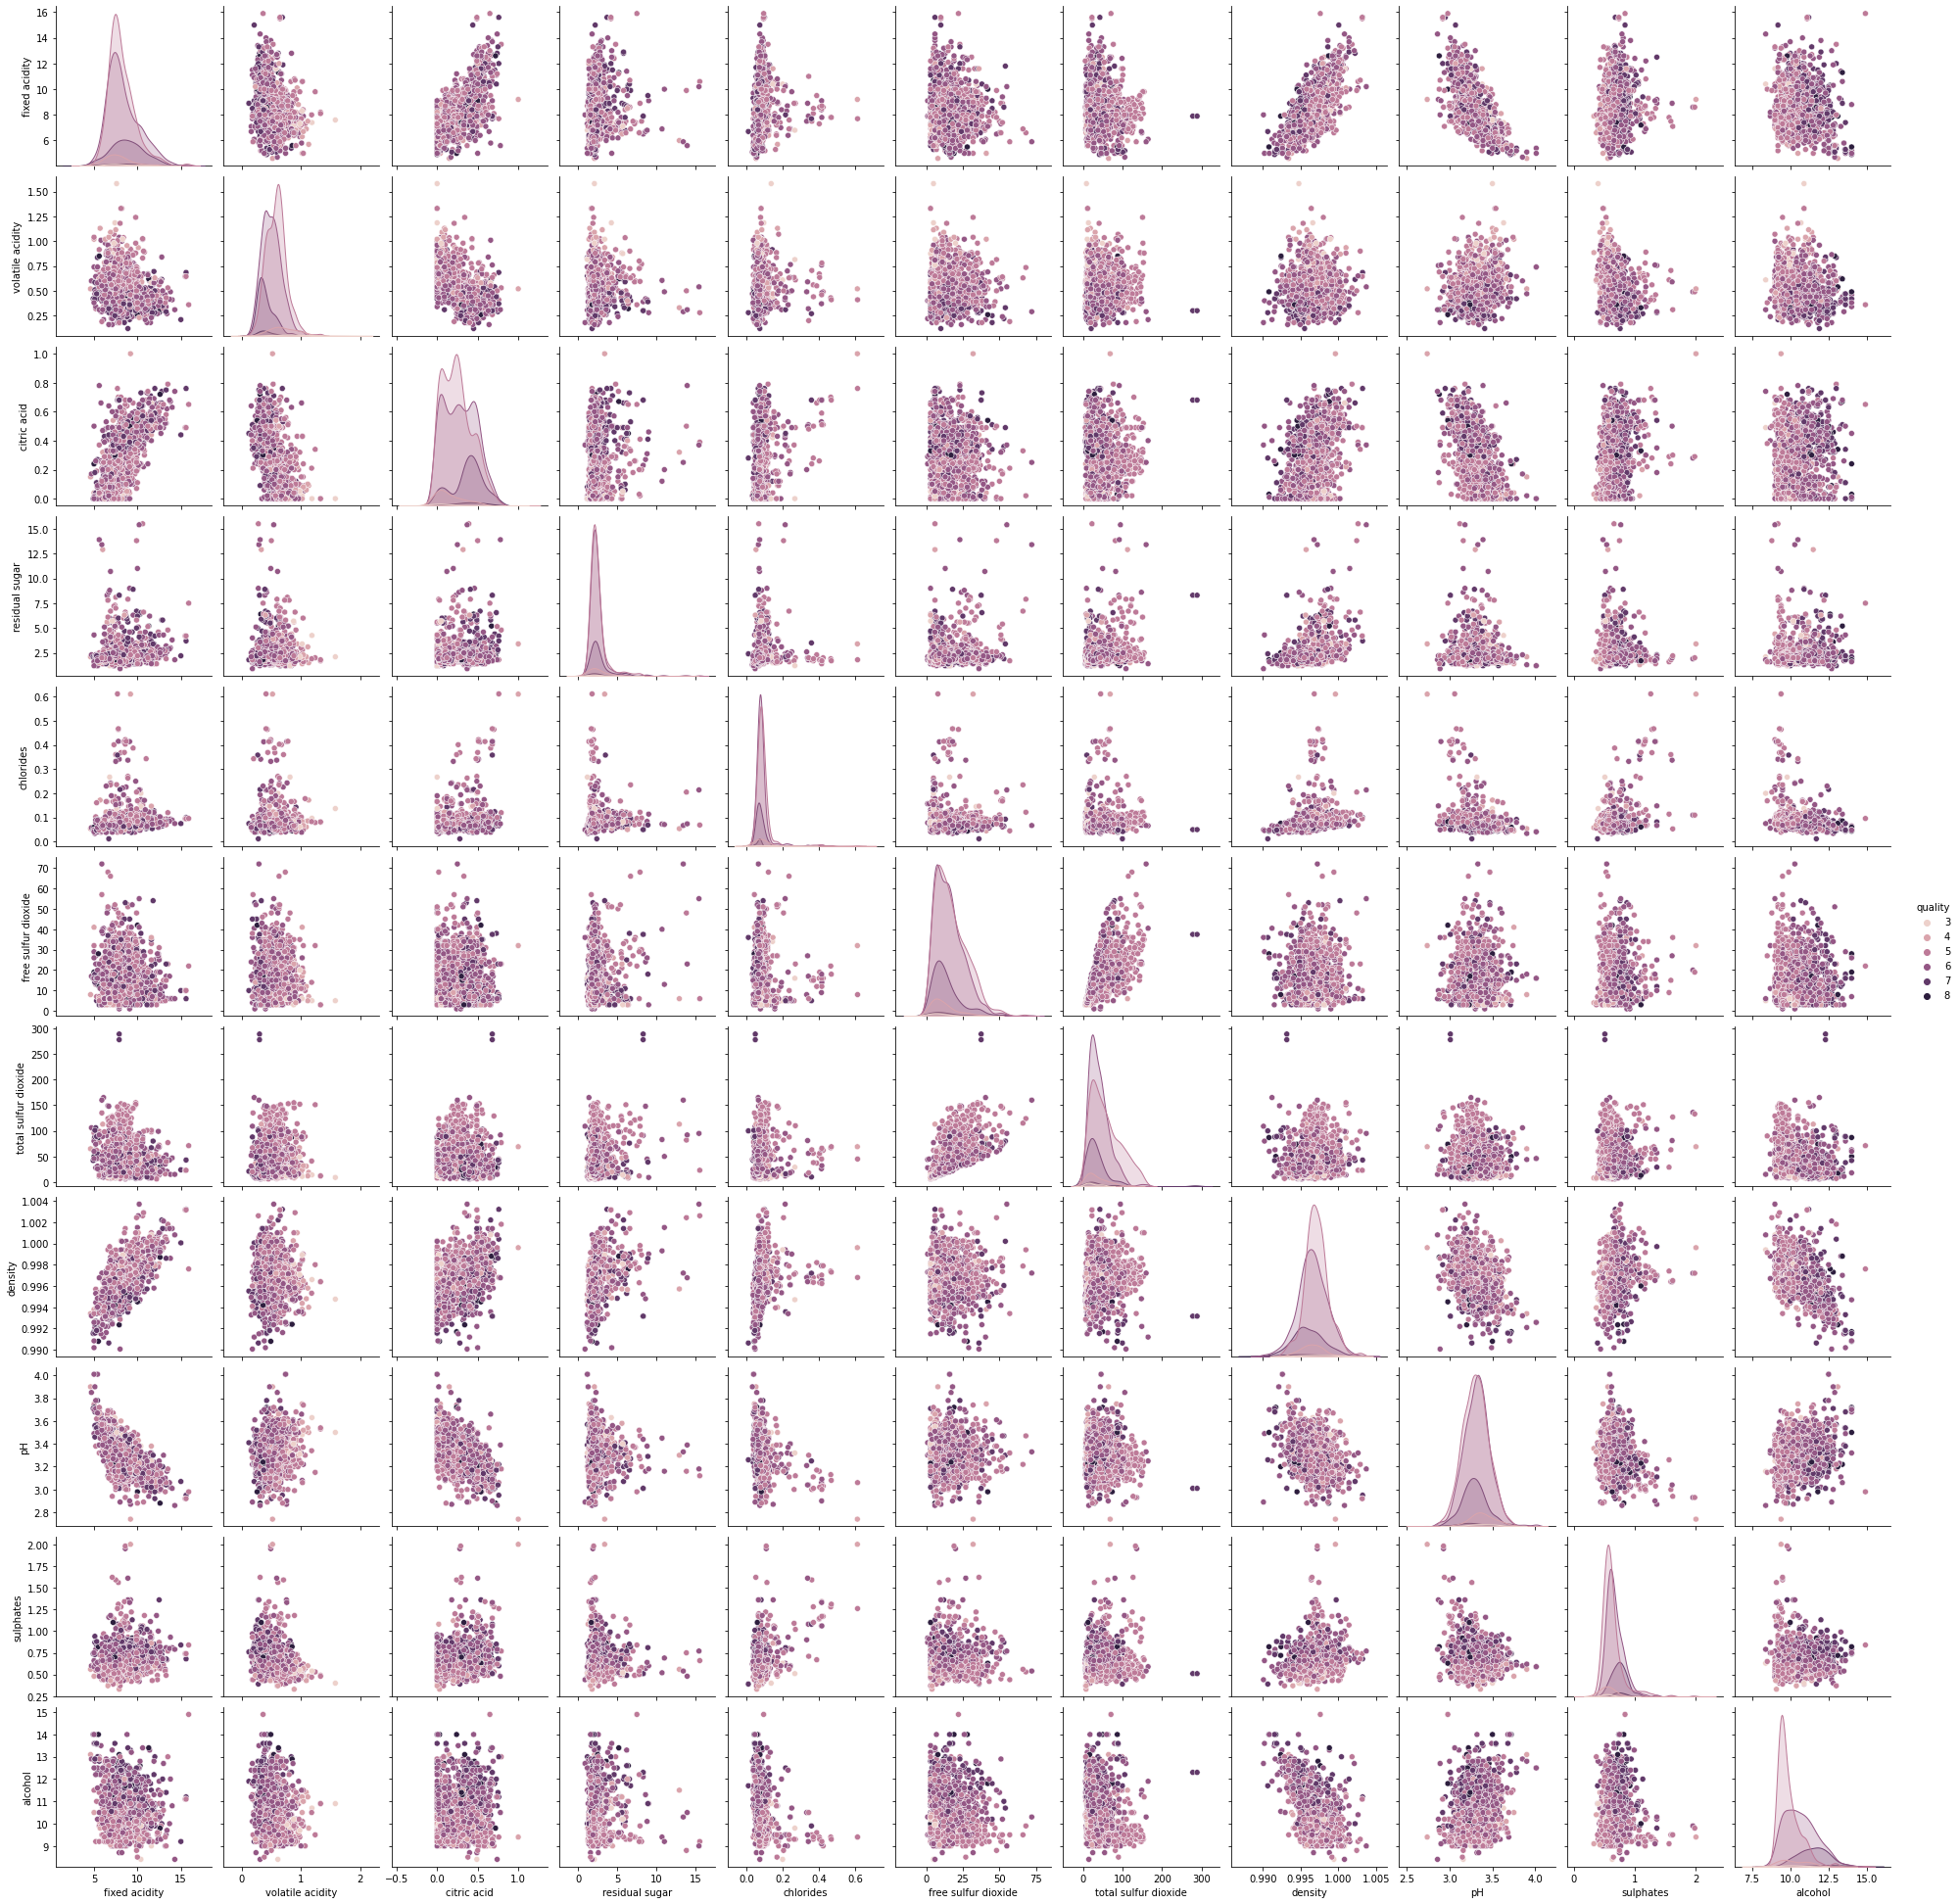

In [13]:
# Визуализация данных
sns.pairplot(ds_new, hue='quality')

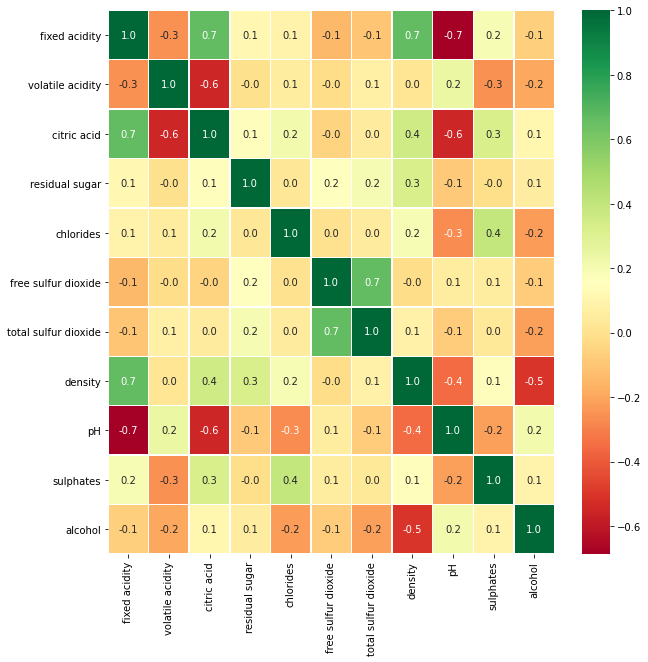

In [14]:
# Визуализация матрицы корреляции: построение корреляционной карты
Y=ds_new['quality'].map({'7': 1, '8': 1, '3': 0, '4': 0, '5': 0, '6': 0})
X=ds_new.drop(['quality'], axis=1)
f,ax=plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.1f', ax=ax);

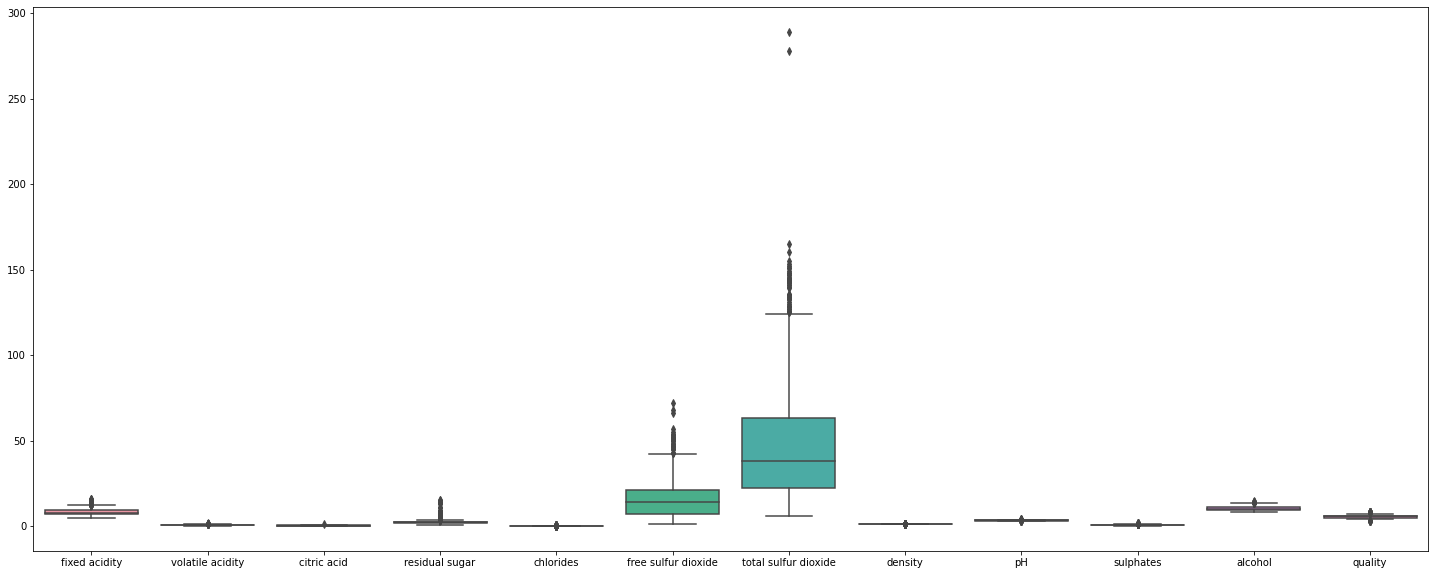

In [15]:
# Построение гистограммы для последующего удаления выбросов
plt.figure(figsize=(25,10))
sns.boxplot(data=ds_new)

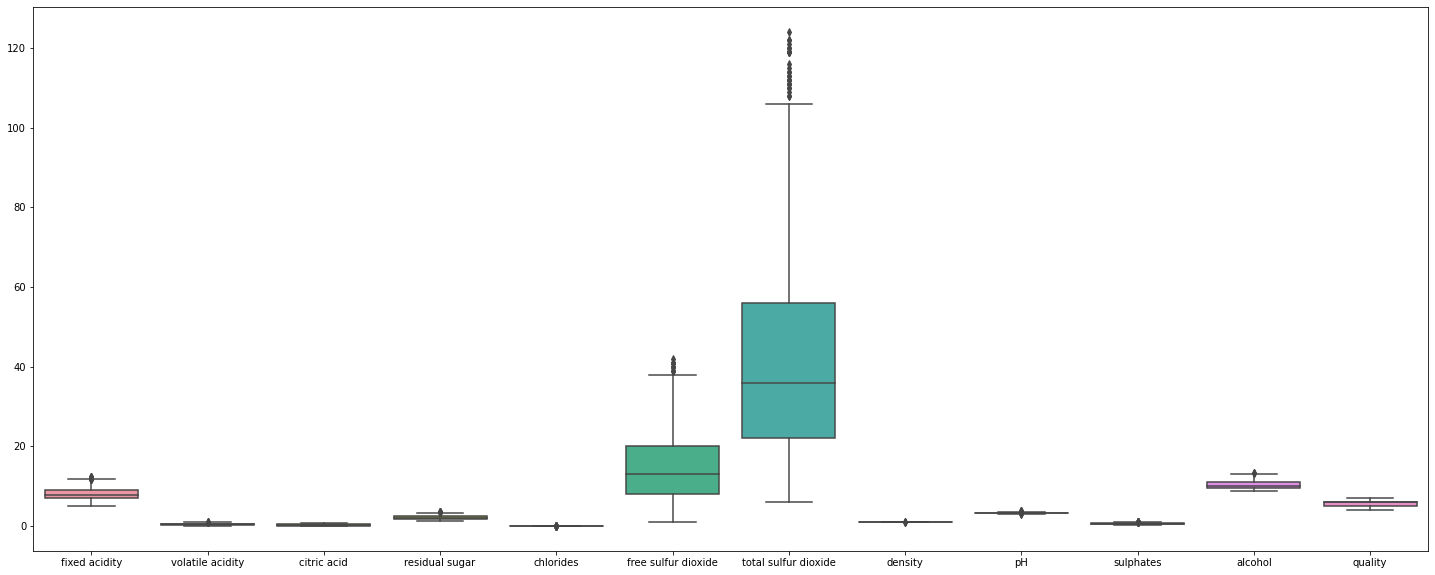

In [16]:
# Удаление выбросов межквартильным методом
q1=ds_new.quantile(0.25)
q2=ds_new.quantile(0.75)
IQR=q2-q1 # IQR - межквартильный диапазон, то есть разброс средней половины набора данных, для определения выбросов
ds_new=ds_new[~((ds_new<(q1-1.5*IQR))|(ds_new>(q2+1.5*IQR))).any(axis=1)]

# Построение гистограммы после удаления выбросов
plt.figure(figsize=(25,10))
sns.boxplot(data=ds_new)

**Предварительная обработка данных**

In [17]:
# Создание функции, которая будет принимать значения "good" и "poor"
def func(x):
    if x>6.5:
        return 'good' # Вино хорошего качества
    else:
        return 'poor' # Вино низкого качества

In [18]:
# Создание столбца "rating" со значениями созданной функции
ds_new['rating']=ds_new['quality'].apply(lambda x: func(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Удаление параметров
X=ds_new.drop(labels=['quality','rating'],axis=1)
y=ds_new['rating']
print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
5               7.4             0.660         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1593            6.8             0.620         0.08  ...  3.42       0.82      9.5
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1005 rows x 11

In [20]:
# Кодирование текстовых значений
encode=LabelEncoder()
y_encode=encode.fit_transform(y)

# Масштабирование значений с помощью приведения к стандартному отклонению и дисперсии, равными 1
# Большинство значений будут находиться в диапазоне от -1 до 1
scaler = StandardScaler()
X=scaler.fit_transform(X)

**Работа с обучаемыми и тестовыми выборками**

In [21]:
# Создание выборок: обучаемых и тестовых
X_train, X_test, y_train, y_test = train_test_split(X,y_encode, test_size=0.33, random_state=42)

In [22]:
# Функция предсказания на данных model1
def fit_predict(model1):
    model = model1
    model.fit(X_train, y_train) # Обучение (тренировка) модели на обучающих выборках X_train, y_train
    y_pred=model.predict(X_test)
    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="2.0f") # Визуализация: построение матрицы
    print("\n")
    print("{} model has accuracy of {}".format(str(model),accuracy_score(y_test, y_pred)))
    return model

**Применение различных методов**

*Метод опорных векторов (SVM)*

Accuracy score: 0.9006024096385542
classification report

              precision    recall  f1-score   support

           0       0.91      0.24      0.38        42
           1       0.90      1.00      0.95       290

    accuracy                           0.90       332
   macro avg       0.90      0.62      0.66       332
weighted avg       0.90      0.90      0.87       332





SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) model has accuracy of 0.9006024096385542


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

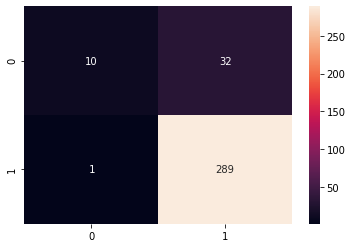

In [23]:
fit_predict(SVC())

*Логистическая регрессия*

Accuracy score: 0.8885542168674698
classification report

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        42
           1       0.91      0.97      0.94       290

    accuracy                           0.89       332
   macro avg       0.76      0.64      0.68       332
weighted avg       0.87      0.89      0.87       332





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) model has accuracy of 0.8885542168674698


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

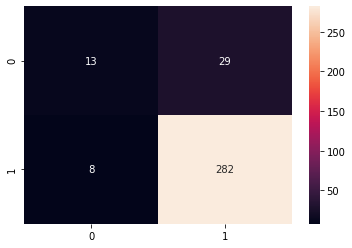

In [24]:
fit_predict(LogisticRegression())

*Метод k-Ближайших Соседей (kNN)*

Accuracy score: 0.7801204819277109
classification report

              precision    recall  f1-score   support

           0       0.29      0.52      0.38        42
           1       0.92      0.82      0.87       290

    accuracy                           0.78       332
   macro avg       0.61      0.67      0.62       332
weighted avg       0.84      0.78      0.80       332





KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform') model has accuracy of 0.7801204819277109


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

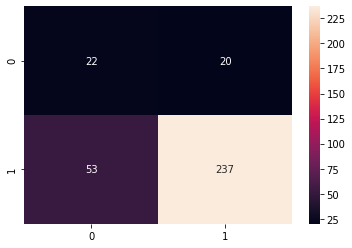

In [25]:
fit_predict(KNeighborsClassifier(n_neighbors=2))

*Сравнение методов*

По **оценке точности** (accuracy score) методы можно ранжировать в следующем порядке:

1. Метод опорных векторов (SVM): 0.9006024096385542
2. Логистическая регрессия: 0.8885542168674698
3. Метод k-ближайших соседей (kNN): 0.7801204819277109

По **количеству правильных прогнозов** для каждого класса (значения главной диагонали) методы можно ранжировать в следующем порядке:

1. Метод опорных векторов (SVM): 10 и 289
2. Логистическая регрессия: 13 и 282
3. Метод k-ближайших соседей (kNN): 22 и 237

По **количеству ложных прогнозов** для каждого класса (значения побочной диагонали) методы можно ранжировать в следующем порядке:

1. Логистическая регрессия: 12 и 8
2. Метод опорных векторов (SVM): 32 и 1
3. Метод k-ближайших соседей (kNN): 20 и 53